# 정규 표현식

In [2]:
import re

## 정규 표현식 모듈함수
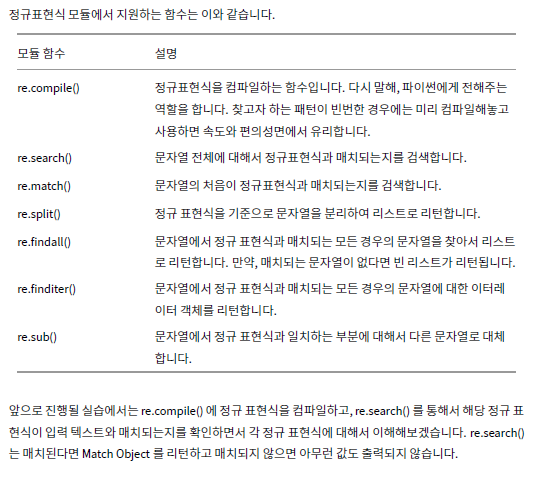


## 정규 표현식 역슬래쉬 문법
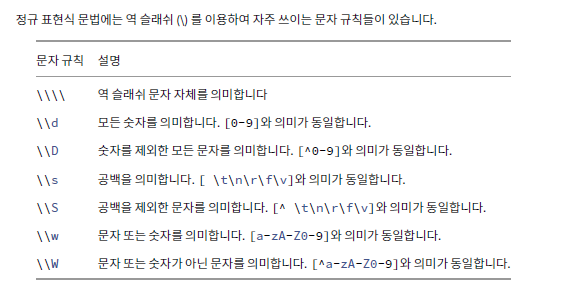

## 1) . 기호

. 은 한 개의 임의의 문자를 나타낸다. \
ex) 정규 표현식이 a.c라고 할 때, a와 c 사이 어떤 1개의 문자라도 올 수 있다.\
akz, azc,avc,a5c, a!c와 같은 형태는 모두 a.c의 정규 표현식과 매치된다.

In [3]:
r = re.compile("a.c")
r.search("kkk")
# kkk에는 a와 c가 없으므로 아무 결과도 출력되지 않을 것

In [4]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

## 2) ? 기호

?는 ? 앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있는 경우를 나타낸다. \
ex) 정규 표현식이 ab?c라 할 때, 이 경우 정규 표현식에서의 b는 있다고 취급할 수도 있고, 없다고 취급할 수도 있다.\
즉 abc와 ac 모두 매치할 수 있다.

In [5]:
r = re.compile("ab?c")
r.search("abbc")
# abbc는 abc나 ac가 아니므로 아무 결과도 출력 x

In [6]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

b가 있는 것으로 판단하여 abc를 매치

In [7]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

b가 없는 것으로 판단하여 ac를 매치

## 3) * 기호

\*는 바로 앞의 문자가 0개 이상일 경우를 나타낸다.\
앞의 문자는 존재하지 않을 수도 잇으며, 또는 여러개 일 수도 있다.\
정규 표현식이 ab*c라면 ac,abc,abbc 등과 매치할 수 잇고 b의 개수는 무수히 많을수도 

In [8]:
r = re.compile("ab*c")
r.search("a")
# a에는 c가 없으므로 아무 결과도 출력되지 x

In [9]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [10]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [11]:
r.search("abbbbbc")

<re.Match object; span=(0, 7), match='abbbbbc'>

## 4) + 기호

+는 *와 유사하지만 다른 점은 앞의 문자가 최소 1개 이상이여야 함\
정규 표현식이 ab+c라고 하면 ac는 매치되지 않는다.\
하지만 abc,abbc,abbbc 등과 매치할 수 있으며, b의 개수는 무수히 많을 수 있다.

In [12]:
r = re.compile("ab+c")
r.search("ac")
# ac엔는 b가 하나도 없으므로 아무것도 출력되지 x

In [13]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [15]:
r.search("abbbbbbc")

<re.Match object; span=(0, 8), match='abbbbbbc'>

## 5) ^ 기호

^로 시작되는 문자열을 지정한다.\
정규표현식이 ^ab라면 문자열 ab로 시작되는 경우 매치한다.

In [16]:
r = re.compile("^ab")

# ab로 시작되는 문자열이 없으므로 아무 결과도 출력되지 x

r.search("bbc")
r.search("zab")

<re.Match object; span=(1, 3), match='ab'>

In [17]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

## 6) {숫자} 기호

문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타낸다.\
예를 들어 정규 표현식이 ab{2}c라면 a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치한다.

In [18]:
r = re.compile("ab{2}c")

# a와 c 사이에 b가 존재하지 않거나 b가 2개인 문자열이 없으므로 아무 것도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbbc")  

In [20]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

## 7) {숫자1, 숫자2} 기호

문자에 해당 기호를 붙이면, 해당 문자를 숫자 1 이상 숫자 2 이하 만큼 반복한다\
ex) 정규 표현식이 ab{2,8}c이라면 a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해 매치

In [23]:
r = re.compile("ab{2,8}c")

# 밑의 2개의 코드는 a와 c 사이에 b가 존재 하지 않거나 b가 2개 이상이 아니므로 아무런 결과도 출력하지 않는다.

r.search("ac")
r.search("abc")
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [24]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [25]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

## 8) {숫자,} 기호

문자에 해당 기호를 붙이면 해당 문자를 숫자 이상 만큼 반복.\
ex) 정규 표현식이 a{2,}bc라면 뒤에 bc가 붙으면서 a의 개수가 2개 이상인 경우의 문자열과 매칭\
만약 {0,}을 쓴다면 *와 동일한 의미,\
{1,}을 쓴다면 +와 같은 의미가 된다.

In [26]:
r = re.compile("a{2,}bc")

# 밑의 코드들은 a의 개수가 2개 이상이며 뒤에 bc가 붙지 않았으므로 아무 결과도 출력되지 않는다

r.search("bc")
r.search("aa")

In [27]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [28]:
r.search("aaaaaaaaaaaaabc")

<re.Match object; span=(0, 15), match='aaaaaaaaaaaaabc'>

## 9) [] 기호

[] 안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미를 가진다.\
ex) 정규 표현식이 [abc] 라면, a 또는 b 또는 c가 들어가있는 문자열과 매치된다.\
범위를 지정하는 것 역시 가능\
[a-zA-Z]는 알파벳 전부를 의미하고, [0-9]는 숫자 전부를 의미

In [29]:
r = re.compile("[abc]")
r.search("zzz")

# zzz에는 abc중 하나라도 포함하고 있지 않으니 아무 결과도 출력되지 않는다.

In [30]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [31]:
r.search("aaaaaaaaaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [32]:
r.search("baaac")

<re.Match object; span=(0, 1), match='b'>

알파벳 소문자에 대해서 범위를 지정하여 정규 표현식을 만들어보자

In [33]:
r = re.compile("[a-z]")

# 다음은 알파벳이 없거나 소문자가 아니므로 아무 결과도 출력되지 않을 것.
r.search("AAA")
r.search("1211")

In [34]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

## 10) [^문자] 기호

[^ 문자]는 ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자들을 매치하는 역할을 한다\
ex) [^abc]라는 정규 표현식이 있다면, a or b or c 가 들어간 문자열을 제외한 모든 문자열을 매치한다.

In [35]:
r = re.compile("[^abc]")

# 밑의 결과는 a,b,c를 제외한다면 어떠한 문자도 없으므로 아무 결과도 출력되지 않을 것
r.search("a")
r.search("ab")
r.search("b") 

In [36]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [40]:
r.search("1")

<re.Match object; span=(0, 1), match='1'>